In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import glob
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, callbacks
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.layers import Conv2D 

In [ ]:
history = new_model.fit(x_train, 
                    y_train, 
                    epochs=100, 
                    verbose=1,
                    validation_data=(x_valid, y_valid),
                       callbacks=[early_stopping_cb])

Epoch 1/100
1933/1933 [==============================] - 1725s 892ms/step - loss: 1.5772 - accuracy: 0.3573 - val_loss: 1.5439 - val_accuracy: 0.3715
Epoch 2/100
1933/1933 [==============================] - 2365s 1s/step - loss: 1.5156 - accuracy: 0.3879 - val_loss: 1.5071 - val_accuracy: 0.3972
Epoch 3/100
1933/1933 [==============================] - 2375s 1s/step - loss: 1.4890 - accuracy: 0.4001 - val_loss: 1.4985 - val_accuracy: 0.4067
Epoch 4/100
1933/1933 [==============================] - 2402s 1s/step - loss: 1.4703 - accuracy: 0.4123 - val_loss: 1.5317 - val_accuracy: 0.3655
Epoch 5/100
 798/1933 [===========>..................] - ETA: 21:09 - loss: 1.4602 - accuracy: 0.4139

In [2]:
data = np.load('/home/lusk.c/XN_project/data.npy')
data /= 255
y =  np.load('/home/lusk.c/XN_project/y.npy')

In [3]:
x_train, x_valid, y_train, y_valid = train_test_split(data, y, test_size=0.1, random_state=0)

In [4]:
model = Sequential()

model.add(Conv2D(32, (7,7),
                 padding='valid',
                 input_shape=(512, 512,1),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(units=40, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=7, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 506, 506, 32)      1600      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 253, 253, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 251, 251, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 125, 125, 32)     0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 125, 125, 32)      0         
                                                                 
 flatten (Flatten)           (None, 500000)            0

In [5]:
model.layers

In [6]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [7]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'./my_mnist_logs/run_001'

In [9]:
early_stopping_cb = keras.callbacks.EarlyStopping(
    min_delta=0.01, # minimium amount of change to count as an improvement
    patience=5, # how many epochs to wait before stopping
)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(x_train, y_train, epochs=8, verbose=1,
                    validation_data=(x_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/8
2113/2113 [==============================] - 9459s 4s/step - loss: 1.8164 - accuracy: 0.2572 - val_loss: 1.7545 - val_accuracy: 0.2840
Epoch 2/8
2113/2113 [==============================] - 9482s 4s/step - loss: 1.6549 - accuracy: 0.3475 - val_loss: 1.6403 - val_accuracy: 0.3593
Epoch 3/8
2113/2113 [==============================] - 9855s 5s/step - loss: 1.4373 - accuracy: 0.4500 - val_loss: 1.4482 - val_accuracy: 0.4486
Epoch 4/8
2113/2113 [==============================] - 9927s 5s/step - loss: 1.2008 - accuracy: 0.5510 - val_loss: 1.3794 - val_accuracy: 0.4877
Epoch 5/8
2113/2113 [==============================] - 9887s 5s/step - loss: 0.9927 - accuracy: 0.6319 - val_loss: 1.2361 - val_accuracy: 0.5521
Epoch 6/8
2113/2113 [==============================] - 10202s 5s/step - loss: 0.8153 - accuracy: 0.7025 - val_loss: 1.1366 - val_accuracy: 0.5985
Epoch 7/8
2113/2113 [==============================] - 10285s 5s/step - loss: 0.6711 - accuracy: 0.7565 - val_loss: 1.2191 - val_

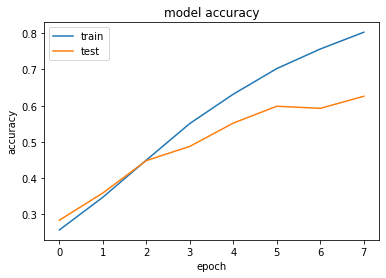

<Figure size 432x288 with 0 Axes>

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('2layerCNN.jpg')

In [11]:
model.save("2layerCNN.h5")